In [1]:
# activate the project environment
using Pkg; Pkg.activate(joinpath(@__DIR__, ".."));

  Activating project at `~/projects/julia-projects/dbscan`


In [2]:
using NearestNeighbors
using dbscan
using StaticArrays
using Dates
using CairoMakie

In [16]:
# points = [SVector{3}(rand(3)) for i in 1:1_000_000]
# points = map(i -> rand(3), 1:1_000_000)
# points = [rand(3) for _ in 1:1_000_000]
points = rand(SVector{2, Float64}, 1_000_000)

1000000-element Vector{SVector{2, Float64}}:
 [0.8652281567366245, 0.5824628969080327]
 [0.6073517844934939, 0.9810172751004054]
 [0.9379339203225104, 0.5237141213473189]
 [0.12489330171502389, 0.6351268685713664]
 [0.9556526099480425, 0.893543892964543]
 [0.7087433091611459, 0.9533943770110053]
 [0.4764809241239697, 0.4177218785189396]
 [0.037658896438501954, 0.5960648474295436]
 [0.22861143354976832, 0.9974186403368681]
 [0.11387327563046878, 0.3477407032335983]
 ⋮
 [0.32999272731515794, 0.20557112172009462]
 [0.5299205792802565, 0.6300130436455414]
 [0.6062531098913249, 0.5985179533285961]
 [0.6680585531256201, 0.01794842355430326]
 [0.9775383681421951, 0.4435837628651458]
 [0.16945153134826207, 0.4869013435085904]
 [0.7295262667567383, 0.29974415794605136]
 [0.25406784762941925, 0.8272156270972231]
 [0.05102523809452464, 0.04709330921874444]

In [23]:
cluster_radius = 0.0003
min_pts = 3

3

In [25]:
clusters = dbscan.DBSCAN(points, cluster_radius, min_pts; n_chunks = 1)

ValueIterator for a Dict{Int64, Vector{Int64}} with 17574 entries. Values:
  [486224, 889350, 896771]
  [263229, 371551, 704630]
  [410667, 453925, 582582]
  [656260]
  [263613]
  [491726, 580197, 600380]
  [107281, 764942, 964398]
  [454824, 520584, 910936]
  [64362, 109729, 300198, 912434]
  [483235, 557793]
  [101606, 676847, 892088]
  [360, 179983, 561676, 633870]
  [328236, 373752, 579618]
  [348848, 462485, 846327]
  [192963, 262584]
  [16303, 390405, 521586]
  [54336, 706764, 872314]
  [100656]
  [13015, 638531, 905772]
  ⋮

In [26]:
tree = KDTree(points)

KDTree{SVector{2, Float64}, Euclidean, Float64, SVector{2, Float64}}
  Number of points: 1000000
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [27]:
inrange(tree, points[263613], cluster_radius)

3-element Vector{Int64}:
 323509
 263613
 612081

In [12]:
function draw_circle!(ax, x0, y0, r)
    t = 0:0.01:2pi
    x = x0 .+ r .* cos.(t)
    y = y0 .+ r .* sin.(t)
    lines!(ax, x, y; color = :black, alpha = 0.1)
end

draw_circle! (generic function with 1 method)

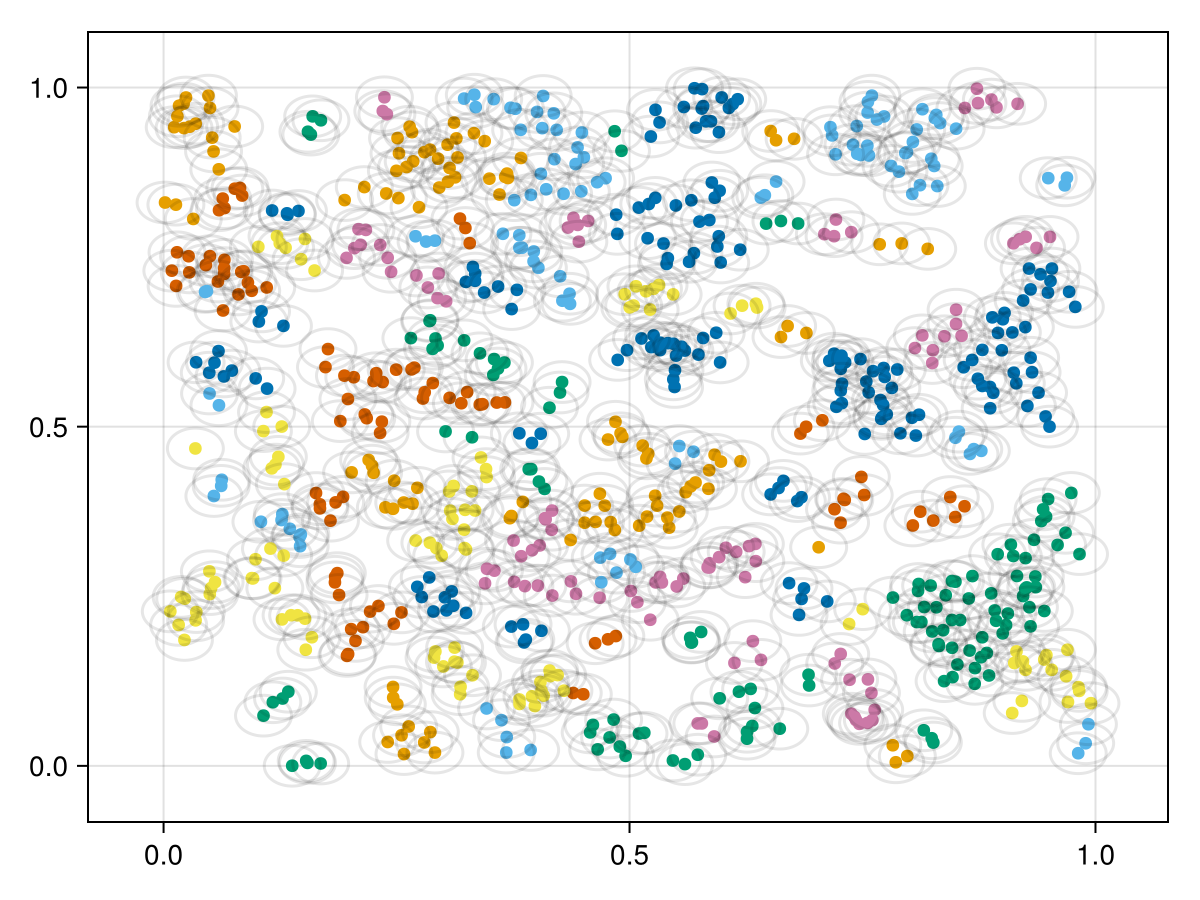

In [14]:
f = Figure()
ax = Axis(f[1, 1])

for (id, cluster) in enumerate(clusters)
    scatter!(points[cluster])
    for (x0, y0) in points[cluster]
        draw_circle!(ax, x0, y0, cluster_radius)
    end
end

f

In [15]:
# wrap timings in a function to avoid global variables causing problems
function run_tests(N; n_chunks = 1)
    times = zeros(N)
    for i in 1:N
        points = rand(SVector{3, Float64}, 1_000_000)
        t0 = now()
        labels = dbscan.DBSCAN(points, 0.01, 3, n_chunks = n_chunks)
        tf = now()
        times[i] = (tf - t0).value / 1000
    end
    return times
end

run_tests (generic function with 1 method)

In [51]:
times_1 = run_tests(10; n_chunks = 1)

10-element Vector{Float64}:
 1.369
 1.411
 1.356
 1.261
 1.381
 1.327
 1.227
 1.355
 1.339
 1.305

In [52]:
times_2 = run_tests(10; n_chunks = 2)

10-element Vector{Float64}:
 1.067
 0.858
 0.876
 0.944
 0.886
 0.967
 0.848
 0.917
 0.845
 0.962

In [53]:
times_4 = run_tests(10; n_chunks = 4)

10-element Vector{Float64}:
 0.85
 0.819
 0.765
 0.821
 0.816
 0.682
 0.855
 0.923
 0.667
 0.783

In [ ]:
# smaller dataset for plotting